In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def numerical_diff(f, w):
    dw = 0.0001
    return (f(w+dw) - f(w)) / dw

In [3]:
def loss_function(w):
    return w**2

In [4]:
w = np.arange(-10.0, 10.0, 0.1)
y = loss_function(w)

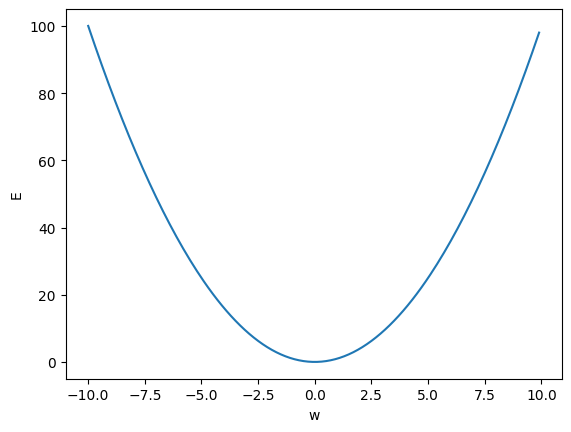

In [5]:
plt.xlabel('w')
plt.ylabel('E')
plt.plot(w, y)
plt.show()

In [6]:
w_50 = numerical_diff(loss_function, 5.0)
w_25 = numerical_diff(loss_function, 2.5)

print(format(w_50, '.3f'))
print(format(w_25, '.3f'))

10.000
5.000


In [7]:
w_50 = numerical_diff(loss_function, -5.0)
w_25 = numerical_diff(loss_function, -2.5)

print(format(w_50, '.3f'))
print(format(w_25, '.3f'))

-10.000
-5.000


In [8]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, a, b):
        self.x = a
        self.y = b
        out = self.x * self.y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [9]:
price_apple = 100
apple_num = 2
tax = 1.1

In [10]:
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

price_apple_num = mul_apple_layer.forward(price_apple, apple_num)
price_apple_tax = mul_tax_layer.forward(price_apple_num, tax)

print('최종 지불 금액:', round(price_apple_tax, 3))

최종 지불 금액: 220.0


In [11]:
dprice = 1
dprice_apple_num, dtax = mul_tax_layer.backward(dprice)
dprice_apple, dapple_num = mul_apple_layer.backward(dprice_apple_num)

print('소비세에 대한 지불 금액의 미분:', dtax)
print('사과 가격에 대한 지불 금액의 미분:', dprice_apple)
print('사과 개수에 대한 지불 금액의 미분', dapple_num)

소비세에 대한 지불 금액의 미분: 200
사과 가격에 대한 지불 금액의 미분: 2.2
사과 개수에 대한 지불 금액의 미분 110.00000000000001


In [12]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [13]:
price_apple = 100
apple_num = 2
price_orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

In [14]:
price_apple_num = mul_apple_layer.forward(price_apple, apple_num)
price_orange_num = mul_orange_layer.forward(price_orange, orange_num)
price_all_num = add_apple_orange_layer.forward(price_apple_num, price_orange_num)
price_all_tax = mul_tax_layer.forward(price_all_num, tax)

print('최종 지불 금액:', round(price_all_tax, 3))

최종 지불 금액: 715.0


In [15]:
dprice = 1
dprice_all_num, dtax = mul_tax_layer.backward(dprice)
dprice_apple_num, dprice_orange_num = add_apple_orange_layer.backward(dprice_all_num)
dprice_orange, dorange_num = mul_orange_layer.backward(dprice_orange_num)
dprice_apple, dapple_num = mul_apple_layer.backward(dprice_apple_num)

print('소비세에 대한 지불 금액의 미분:', dtax)
print('사과 가격에 대한 지불 금액의 미분:', dprice_apple)
print('사과 개수에 대한 지불 금액의 미분:', dapple_num)
print('오렌지 가격에 대한 지불 금액의 미분:', dprice_orange)
print('오렌지 개수에 대한 지불 금액의 미분:', dorange_num)

소비세에 대한 지불 금액의 미분: 650
사과 가격에 대한 지불 금액의 미분: 2.2
사과 개수에 대한 지불 금액의 미분: 110.00000000000001
오렌지 가격에 대한 지불 금액의 미분: 3.3000000000000003
오렌지 개수에 대한 지불 금액의 미분: 165.0
